# Installing and importing necessary libraries.

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Data cleaning and trasformation

In [112]:
df_original = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\data\Used_cars\AutoScout24__Dataframe_cleaned.csv", encoding='latin-1')
df = df_original.copy()
df.head()

,Unnamed: 0,Brand,Price,Carrosserie,État,Portes,Kilométrage,Année,Transmission,Carburant,...,Capteurs d'aide au stationnement avant,Climatisation,Climatisation automatique,Start/Stop automatique,Système de navigation,Volant en cuir,Volant multifonctions,Pays,ModelC,Puissance kW
0,0,Renault,115001.0,Utilitaire,Ancêtre,2.0,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 Fourgonnette,22
1,1,Renault,19990.0,Citadine,Occasion,3.0,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,False,luxembourg,R 5 Super 5 GT Turbo,88
2,2,Renault,5990.0,Berline,Occasion,5.0,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 GTL,25
3,3,Renault,16890.0,Berline,Occasion,4.0,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,True,luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129
4,4,Renault,1500.0,Autres,Occasion,2.0,165000,2002.0,Boîte manuelle,Essence,...,False,True,False,False,False,False,False,luxembourg,Clio 1.2,43


In [113]:
# Let's see a summary of the dataframe.

def summary(df):
    print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Missing %"] = df.isnull().sum() / len(df) * 100
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 24 columns and 100659 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,100659,0,0.0,0,int64
Brand,57,0,0.0,0,object
Price,21802,0,0.0,0,float64
Carrosserie,9,0,0.0,0,object
État,6,0,0.0,0,object
Portes,8,0,0.0,0,float64
Kilométrage,31276,0,0.0,0,int64
Année,92,0,0.0,0,float64
Transmission,3,0,0.0,0,object
Carburant,39,0,0.0,0,object


In [114]:
new_column_names = {
    'Unnamed:0': 'No',
    'Carrosserie': 'Body',
    'État': 'Condition',
    'Portes' : 'Doors',
    "Kilométrage" :"Kilometers",
    "Année" : "Year",
    "Carburant" : "Fuel Type",
    "Couleur extérieure" : "Color",
    "Accoudoir" : "Armrest",
    "Assistant de démarrage en côte" :"Hill Start Assist",
    "Capteurs d'aide au stationnement arrière" : "Rear Parking Sensors",
    "Capteurs d'aide au stationnement avant" : "Front Parking Sensors",
    "Climatisation" :"Air Conditioning",
    "Climatisation automatique" : "AutomatAutomaticic Air Conditioning",
    "Start/Stop automatique" : "Automatic Start/Stop",
    "Système de navigation" : "Navigation System",
    "Volant en cuir" : "Leather Steering Wheel",
    "Volant multifonctions" : "Multifunction Steering Wheel",
    "Pays" : "Country",
    "ModelC" : "Model",
    "Puissance kW" : "Power in kilowatts"
}

df.rename(columns=new_column_names, inplace=True)
df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,Front Parking Sensors,Air Conditioning,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts
0,0,Renault,115001.0,Utilitaire,Ancêtre,2.0,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 Fourgonnette,22
1,1,Renault,19990.0,Citadine,Occasion,3.0,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,False,luxembourg,R 5 Super 5 GT Turbo,88
2,2,Renault,5990.0,Berline,Occasion,5.0,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 GTL,25
3,3,Renault,16890.0,Berline,Occasion,4.0,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,True,luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129
4,4,Renault,1500.0,Autres,Occasion,2.0,165000,2002.0,Boîte manuelle,Essence,...,False,True,False,False,False,False,False,luxembourg,Clio 1.2,43


In [115]:
summary(df)

Dataset has 24 columns and 100659 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,100659,0,0.0,0,int64
Brand,57,0,0.0,0,object
Price,21802,0,0.0,0,float64
Body,9,0,0.0,0,object
Condition,6,0,0.0,0,object
Doors,8,0,0.0,0,float64
Kilometers,31276,0,0.0,0,int64
Year,92,0,0.0,0,float64
Transmission,3,0,0.0,0,object
Fuel Type,39,0,0.0,0,object


In [116]:
df["MFG date"] = df["Year"].astype(int)

In [117]:
df["Body"].value_counts()

SUV/4x4/Pick-Up    33336
Berline            18428
Coupé              13771
Break              12321
Cabriolet           9079
Monospace           5154
Utilitaire          3370
Citadine            3009
Autres              2191
Name: Body, dtype: int64

In [118]:
# Define a dictionary to map French values to English translations
body_translation = {
    "SUV/4x4/Pick-Up": "SUV/4x4/Pick-Up",
    "Berline": "Sedan",
    "Coupé": "Coupe",
    "Break": "Station Wagon",
    "Cabriolet": "Convertible",
    "Monospace": "Minivan",
    "Utilitaire": "Utility",
    "Citadine": "City Car",
    "Autres": "Other"
}

# Replace the values in the "Body" column using the translation dictionary
df['Body'] = df['Body'].map(body_translation)

# Print the updated value counts
print(df['Body'].value_counts())

SUV/4x4/Pick-Up    33336
Sedan              18428
Coupe              13771
Station Wagon      12321
Convertible         9079
Minivan             5154
Utility             3370
City Car            3009
Other               2191
Name: Body, dtype: int64


In [119]:
df["Color"].value_counts()

Noir      31399
Gris      26342
Blanc     16223
Bleu      10274
Argent     6394
Rouge      4464
Vert       1951
Brun        890
Orange      784
Jaune       758
Beige       512
Bronze      261
Mauve       208
Or          199
Name: Color, dtype: int64

In [120]:
# Define a dictionary to map French values to English translations
color_translation = {
    "Noir": "Black",
    "Gris": "Gray",
    "Blanc": "White",
    "Bleu": "Blue",
    "Argent": "Silver",
    "Rouge": "Red",
    "Vert": "Green",
    "Brun": "Brown",
    "Orange": "Orange",
    "Jaune": "Yellow",
    "Beige": "Beige",
    "Bronze": "Bronze",
    "Mauve": "Mauve",
    "Or": "Gold"
}

# Replace the values in the "Color" column using the translation dictionary
df['Color'] = df['Color'].map(color_translation)

# Print the updated value counts
print(df['Color'].value_counts())

Black     31399
Gray      26342
White     16223
Blue      10274
Silver     6394
Red        4464
Green      1951
Brown       890
Orange      784
Yellow      758
Beige       512
Bronze      261
Mauve       208
Gold        199
Name: Color, dtype: int64


In [121]:
df["Condition"].value_counts()

Occasion              78598
Neuf                   9234
Démonstration          6042
Pré-enregistrement     4160
Voiture récente        1655
Ancêtre                 970
Name: Condition, dtype: int64

In [122]:
# Define a dictionary to map French values to English translations
condition_translation = {
    "Occasion": "Used",
    "Neuf": "New",
    "Démonstration": "Demonstration",
    "Pré-enregistrement": "Pre-registered",
    "Voiture récente": "Recent car",
    "Ancêtre": "Antique"
}

# Replace the values in the "Condition" column using the translation dictionary
df['Condition'] = df['Condition'].map(condition_translation)

# Print the updated value counts
print(df['Condition'].value_counts())

Used              78598
New                9234
Demonstration      6042
Pre-registered     4160
Recent car         1655
Antique             970
Name: Condition, dtype: int64


In [123]:
df["Doors"] = df["Doors"].astype(int)

In [124]:
df["Country"].value_counts()

Germany       21327
NL            17065
France        16820
Italy         15352
Austria       14423
Belgium       13049
luxembourg     2623
Name: Country, dtype: int64

In [125]:
df['Country'] = df['Country'].replace('NL', 'Netherlands')
df['Country'] = df['Country'].replace('luxembourg', 'Luxembourg')

In [126]:
df["HP"] = df["Power in kilowatts"]*1.341
df["HP"].astype(int)

0          29
1         118
2          33
3         172
4          57
         ... 
100654    502
100655    288
100656    325
100657    328
100658    325
Name: HP, Length: 100659, dtype: int32

# EDA

In [127]:
df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts,MFG date,HP
0,0,Renault,115001.0,Utility,Antique,2,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 Fourgonnette,22,1987,29.502
1,1,Renault,19990.0,City Car,Used,3,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,True,False,Luxembourg,R 5 Super 5 GT Turbo,88,1989,118.008
2,2,Renault,5990.0,Sedan,Used,5,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 GTL,25,1991,33.525
3,3,Renault,16890.0,Sedan,Used,4,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,True,True,Luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129,1992,172.989
4,4,Renault,1500.0,Other,Used,2,165000,2002.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,Clio 1.2,43,2002,57.663


In [128]:
df.describe()

,Unnamed: 0,Price,Doors,Kilometers,Year,Power in kilowatts,MFG date,HP
count,100659.00000,1.006590e+05,100659.000000,100659.000000,100659.000000,100659.000000,100659.000000,100659.000000
mean,50329.00000,4.546890e+05,4.172980,48936.634429,2016.746262,207.255904,2016.746262,277.930167
std,29057.89471,4.933581e+05,1.169335,64047.783151,9.371450,108.967266,9.371450,146.125103
min,0.00000,5.331205e+02,1.000000,0.000000,1900.000000,1.000000,1900.000000,1.341000
25%,25164.50000,5.266850e+04,4.000000,4900.000000,2017.000000,118.000000,2017.000000,158.238000
50%,50329.00000,3.469010e+05,5.000000,23183.000000,2020.000000,180.000000,2020.000000,241.380000
75%,75493.50000,7.089010e+05,5.000000,69274.500000,2022.000000,280.000000,2022.000000,375.480000
max,100658.00000,2.716341e+06,8.000000,400000.000000,2023.000000,2320.000000,2023.000000,3111.120000


C:\Users\user\AppData\Local\Temp\ipykernel_7352\2659195720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\user\AppData\Local\Temp\ipykernel_7352\2659195720.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


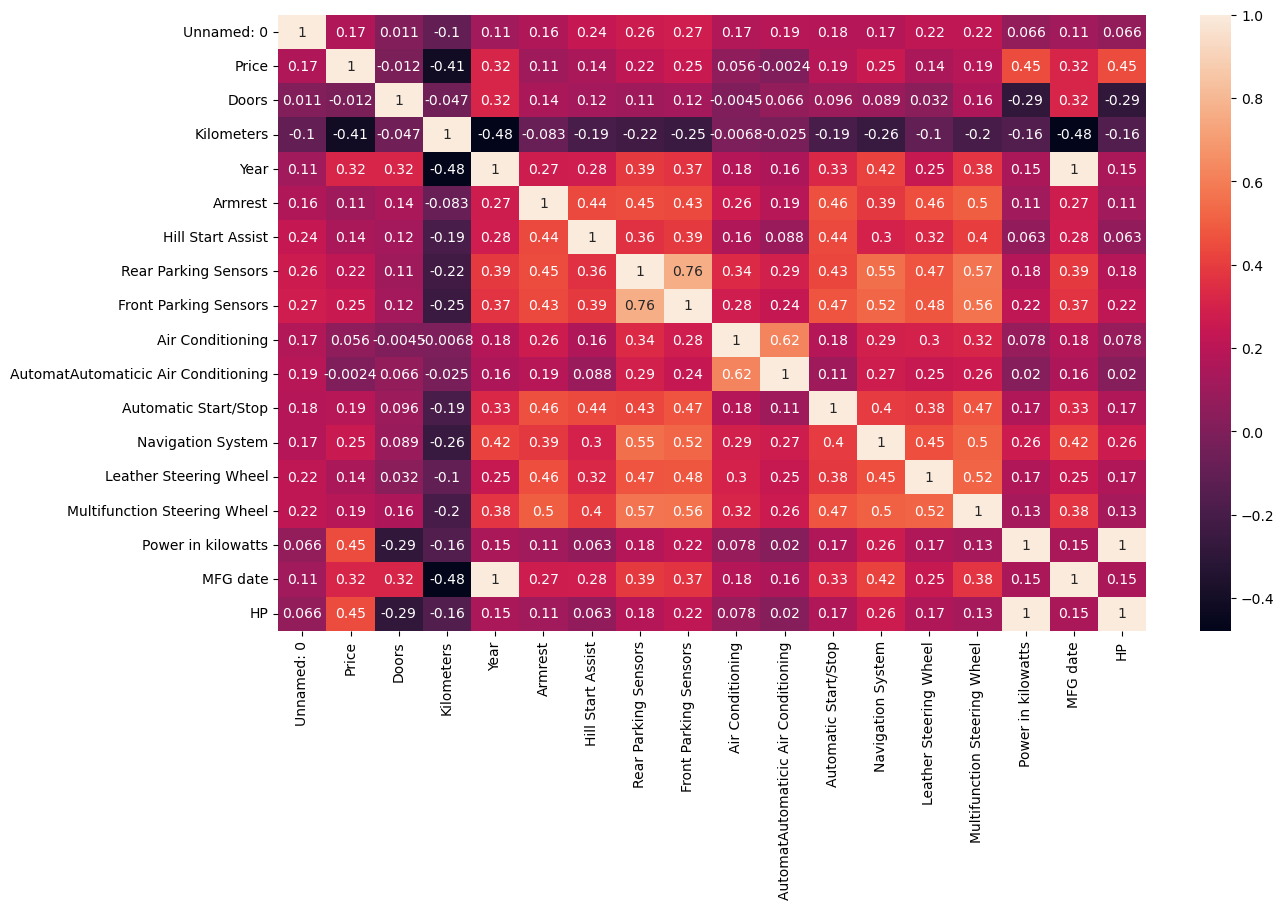

In [129]:
plt.figure(figsize=(14, 8))
df.corr()
sns.heatmap(df.corr(), annot = True)
plt.show()

In [130]:
# Create a new DataFrame with cars from 2015 and later
df_2015 = df[df['Year'] >= 2015].copy()

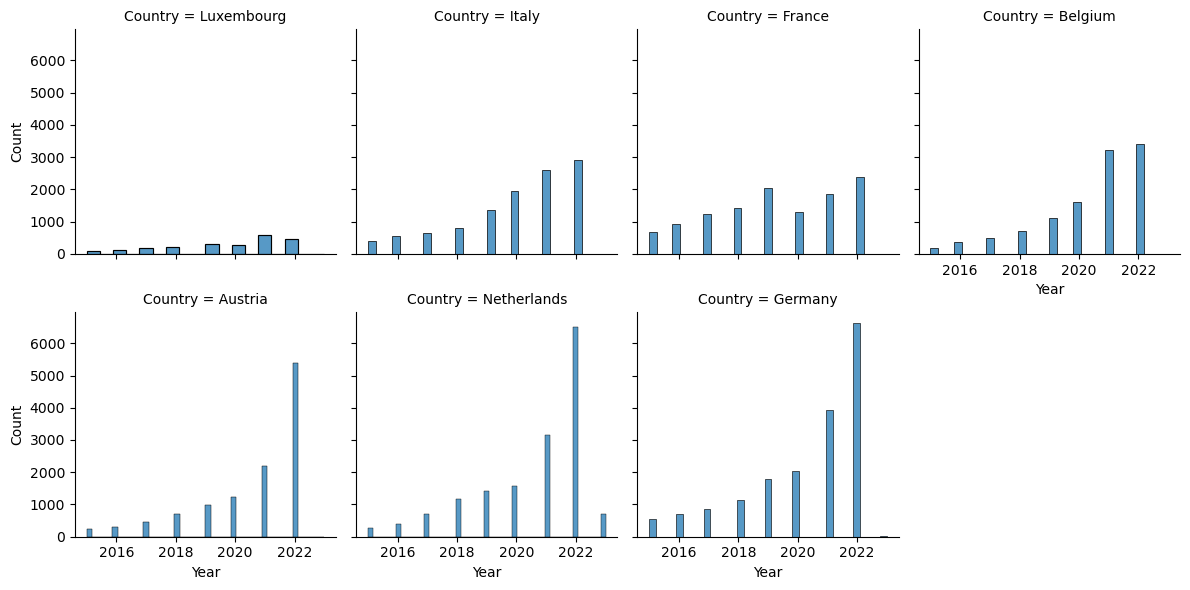

In [103]:
# Create a FacetGrid with the DataFrame
g = sns.FacetGrid(data=df_2015, col="Country", col_wrap=4)

# Use map function to plot histplot for each country
g.map(sns.histplot, "Year")

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Brand'>

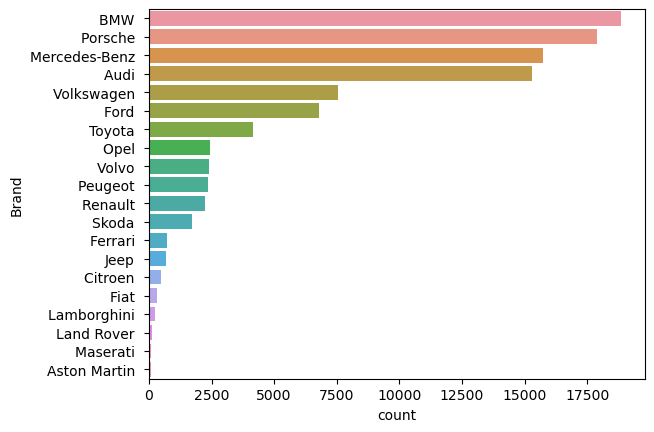

In [138]:
sns.countplot(data=df, y="Brand",order=df.Brand.value_counts().iloc[:20].index)

In [169]:
import pandas as pd
from scipy.stats import linregress

# Create an empty dataframe
result_df = pd.DataFrame(columns=['Brand', 'Rate'])

# Group the data by "Brand"
grouped = df.groupby('Brand')

# Iterate over each brand group
for brand, group in grouped:
    # Select the "Year" and "Price" columns from the group
    x = group['Year']
    y = group['Price']
    
    # Check if there is enough variation in the years
    if x.nunique() > 1:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calculate the rate of price decrease
        rate = -slope
        
        # Add a row to the result dataframe
        result_df = result_df.append({'Brand': brand, 'Rate': rate}, ignore_index=True)





C:\Users\user\AppData\Local\Temp\ipykernel_7352\2139582063.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Brand': brand, 'Rate': rate}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7352\2139582063.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Brand': brand, 'Rate': rate}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7352\2139582063.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Brand': brand, 'Rate': rate}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7352\2139582063.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

In [170]:
print(result_df.sort_values(by="Rate", ascending = False))

             Brand           Rate
24        Maybach   143875.125000
29       Oldtimer    22901.948843
5        Cadillac     1614.676463
14         HUMMER      805.460751
18         Lancia      154.415928
12           Fiat    -3240.245205
7         Citroen    -3978.121925
13           Ford    -7428.219537
0      Alfa Romeo    -8407.928652
34    Rolls-Royce    -8778.948041
23       Maserati    -9708.309952
17    Lamborghini   -10111.521564
11        Ferrari   -13092.740937
31        Peugeot   -13764.481957
33        Renault   -14068.443835
38     Volkswagen   -14285.085379
37         Toyota   -16016.805241
22           MINI   -16181.994542
10          Dodge   -16201.389318
30           Opel   -17456.827472
26  Mercedes-Benz   -17984.527998
1    Aston Martin   -18803.037426
39          Volvo   -19111.371664
15         Jaguar   -19332.182675
32        Porsche   -19780.062351
16           Jeep   -19911.129897
6       Chevrolet   -20139.206726
35          Skoda   -21150.516267
3             

In [171]:
result_df["Rate"] = result_df["Rate"].astype(int)

In [172]:
print(result_df.sort_values(by="Rate", ascending = False))

             Brand    Rate
24        Maybach   143875
29       Oldtimer    22901
5        Cadillac     1614
14         HUMMER      805
18         Lancia      154
12           Fiat    -3240
7         Citroen    -3978
13           Ford    -7428
0      Alfa Romeo    -8407
34    Rolls-Royce    -8778
23       Maserati    -9708
17    Lamborghini   -10111
11        Ferrari   -13092
31        Peugeot   -13764
33        Renault   -14068
38     Volkswagen   -14285
37         Toyota   -16016
22           MINI   -16181
10          Dodge   -16201
30           Opel   -17456
26  Mercedes-Benz   -17984
1    Aston Martin   -18803
39          Volvo   -19111
15         Jaguar   -19332
32        Porsche   -19780
16           Jeep   -19911
6       Chevrolet   -20139
35          Skoda   -21150
3             BMW   -29592
28         Nissan   -31703
9       De Tomaso   -34444
2            Audi   -38637
19     Land Rover   -42762
21          Lotus   -63398
25        McLaren   -85973
4         Bentley   -92292
8

In [173]:
brands = ['Fiat', 'Citroen', 'Ford', "Lancia","Peugeot","Renault","Volkswagen"]
new_df = df[df['Brand'].str.strip().isin(brands)].copy()

In [175]:
new_df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts,MFG date,HP
0,0,Renault,115001.0,Utility,Antique,2,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 Fourgonnette,22,1987,29.502
1,1,Renault,19990.0,City Car,Used,3,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,True,False,Luxembourg,R 5 Super 5 GT Turbo,88,1989,118.008
2,2,Renault,5990.0,Sedan,Used,5,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 GTL,25,1991,33.525
3,3,Renault,16890.0,Sedan,Used,4,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,True,True,Luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129,1992,172.989
4,4,Renault,1500.0,Other,Used,2,165000,2002.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,Clio 1.2,43,2002,57.663


In [190]:
new_df["Brand"].value_counts()

Volkswagen     7544
Ford           6779
Peugeot        2349
Renault        2252
Citroen         466
Fiat            322
Lancia           41
Name: Brand, dtype: int64

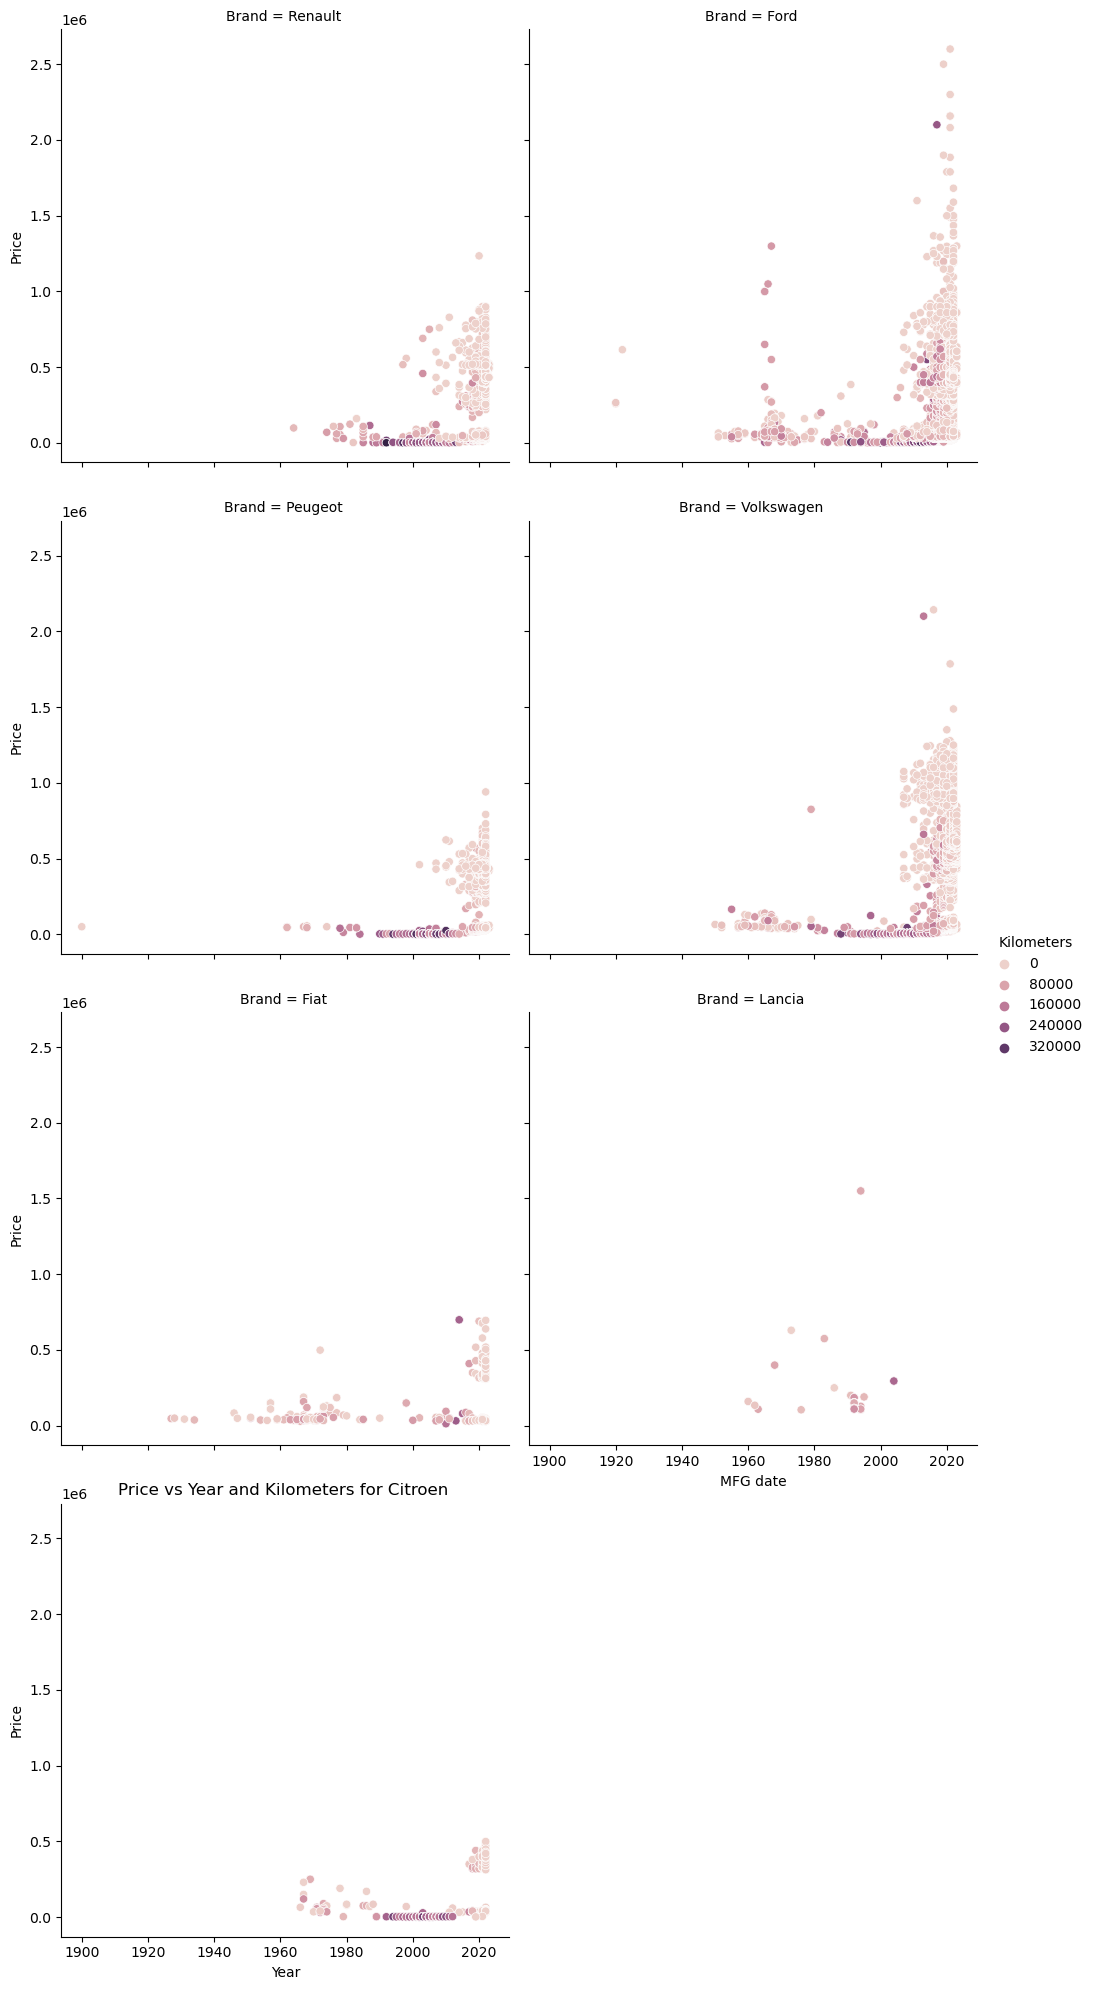

In [208]:
sns.relplot(data=new_df, x='MFG date', y='Price', col = "Brand",col_wrap = 2, kind = "scatter", hue='Kilometers')
plt.title(f'Price vs Year and Kilometers for {brand}')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

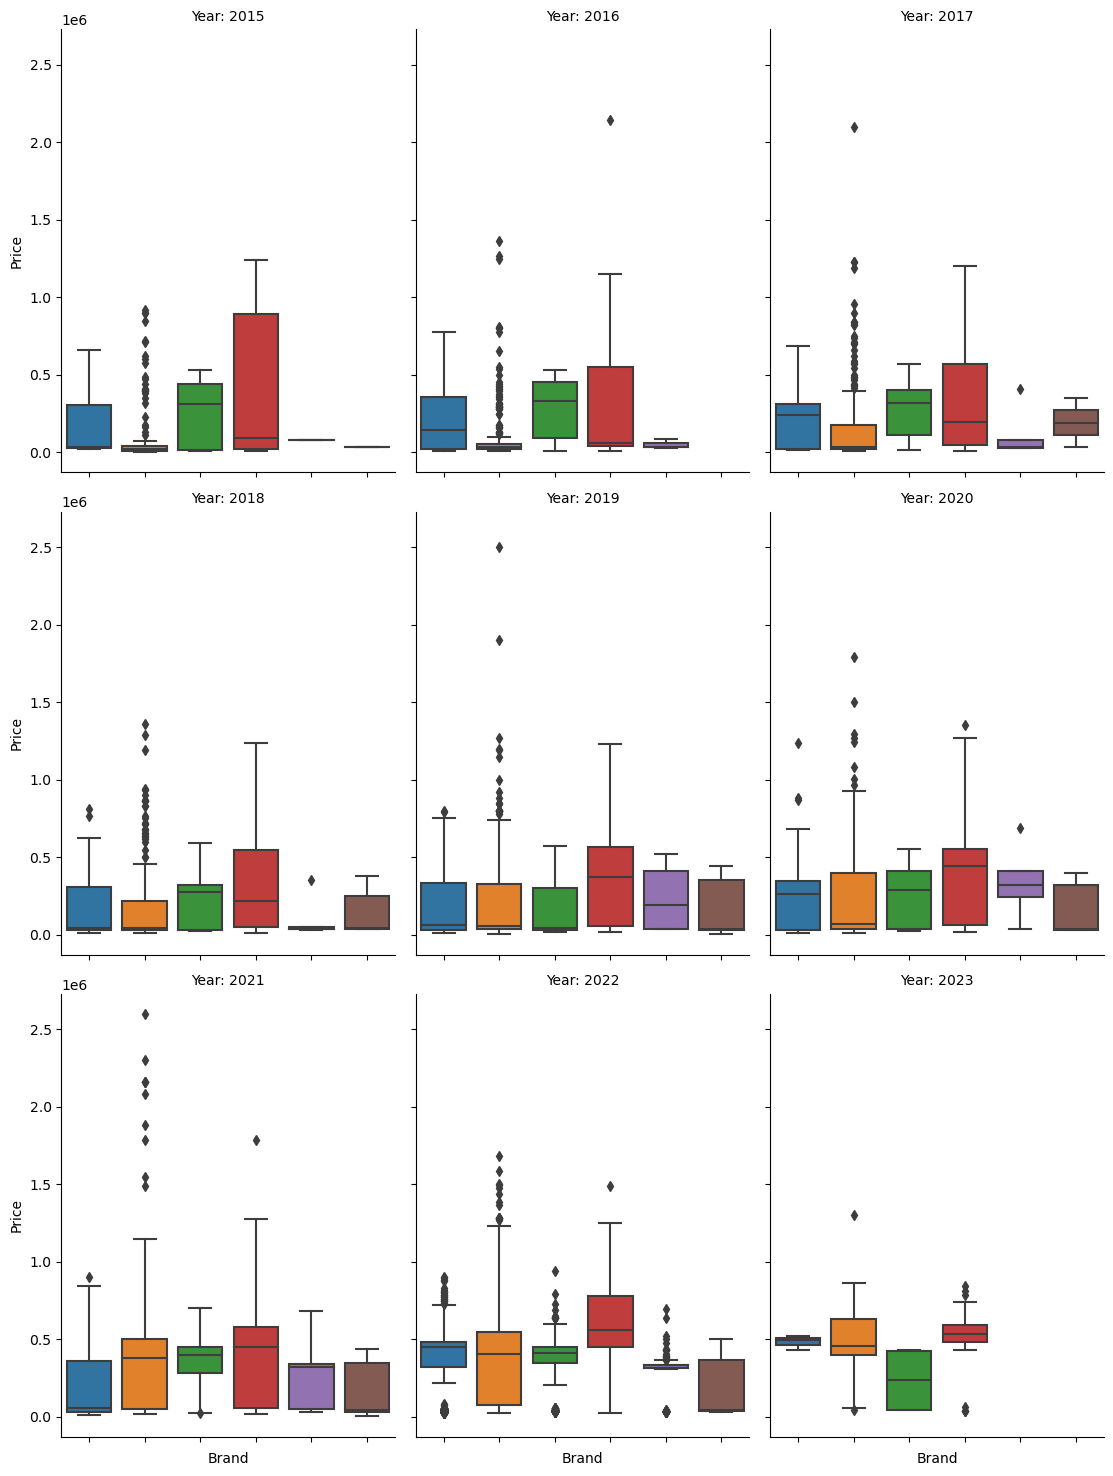

In [278]:
df_2015 = new_df[new_df['MFG date'] >= 2015]

catplot = sns.catplot(data=df_2015, x='Brand', y='Price', kind = "box",col = "MFG date", col_wrap=3,aspect = 0.75)
catplot.set_titles("Year: {col_name}")
catplot.set_xlabels("Brand")
for ax in catplot.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
catplot.set_ylabels("Price")

plt.show()